# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [122]:
%matplotlib inline

import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.stats.api as mod
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns
sns.set()

In [43]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [44]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

C:\Users\zalle\Anaconda3\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


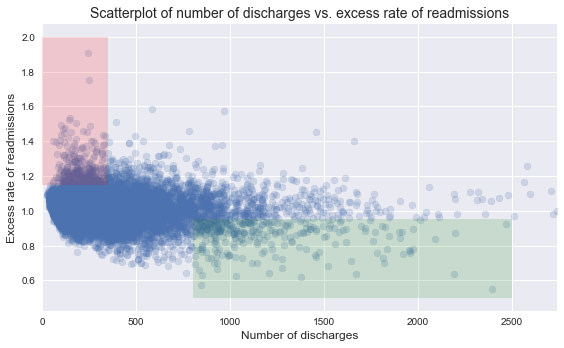

In [45]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

### Preliminary Analysis

In [46]:
# Do we have any missing data points

print(clean_hospital_read_df.isnull().any())


Hospital Name                 False
Provider Number               False
State                         False
Measure Name                  False
Number of Discharges          False
Footnote                       True
Excess Readmission Ratio       True
Predicted Readmission Rate     True
Expected Readmission Rate      True
Number of Readmissions         True
Start Date                    False
End Date                      False
dtype: bool


As we will principally be looking at the excess readmission ratio I will drop any entries missing this feature

In [47]:
# Clearing entries with missing values
clean_hospital_read_df = clean_hospital_read_df[np.logical_not(clean_hospital_read_df['Excess Readmission Ratio'].isnull())]

In [48]:
# Examine the structure of the data
clean_hospital_read_df.head()

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
1832,UNIVERSITY OF MD CHARLES REGIONAL MEDICAL CENTER,210035,MD,READM-30-AMI-HRRP,25,NaN,1.0914,26.8,24.6,12.0,07/01/2010,06/30/2013
1699,ATLANTIC GENERAL HOSPITAL,210061,MD,READM-30-AMI-HRRP,27,NaN,1.0961,24.8,22.6,12.0,07/01/2010,06/30/2013
1774,MERCY MEDICAL CENTER INC,210008,MD,READM-30-AMI-HRRP,28,NaN,1.0934,24.4,22.3,12.0,07/01/2010,06/30/2013
1853,KAISER FOUNDATION HOSPITAL-SANTA CLARA,50071,CA,READM-30-HF-HRRP,29,NaN,1.0908,21.0,19.3,11.0,07/01/2010,06/30/2013
1290,PALMERTON HOSPITAL,390019,PA,READM-30-AMI-HRRP,30,NaN,1.1123,23.2,20.9,13.0,07/01/2010,06/30/2013


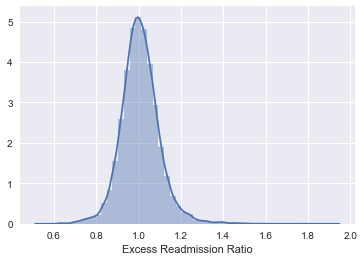

In [49]:
# another round of data cleaning
clean_hospital_read_df = clean_hospital_read_df[np.logical_not(clean_hospital_read_df['Excess Readmission Ratio'].isnull())]

# Checking for a normal distribution
sns.distplot(clean_hospital_read_df['Excess Readmission Ratio']);

In [50]:
# How well is our data geographically distributed?
print('number of hospitals: ', clean_hospital_read_df['Hospital Name'].nunique())
print('number of states: ', clean_hospital_read_df['State'].nunique())

number of hospitals:  2879
number of states:  51


In [51]:
clean_hospital_read_df.describe()

,Provider Number,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions
count,11497.000000,11497.000000,0.0,11497.000000,11497.000000,11497.000000,11497.000000
mean,257571.540141,365.466209,NaN,1.007504,17.984292,17.865695,63.633731
std,154274.374018,308.754590,NaN,0.091964,5.487651,5.240749,59.540296
min,10001.000000,25.000000,NaN,0.549500,2.700000,3.900000,11.000000
25%,110129.000000,160.000000,NaN,0.952600,16.300000,16.600000,24.000000
50%,250042.000000,282.000000,NaN,1.003500,19.000000,19.000000,45.000000
75%,390039.000000,474.000000,NaN,1.058100,21.500000,21.400000,82.000000
max,670082.000000,6793.000000,NaN,1.909500,32.800000,28.000000,879.000000


### A) Do you agree with the above analysis and recommendations? Why or why not?

Lets examine their first two claims:

- In hospitals/facilities with **number of discharges < 100**, mean excess readmission rate is **1.023** and **63%** have excess readmission rate greater than 1.

In [58]:
# subset the data
less_than_100 = clean_hospital_read_df[(clean_hospital_read_df['Number of Discharges'] < 100)]

# number fo hospitals
print('# Hospitals with < 100 discharges: ', len(less_than_100))

# what is the mean rate
print('Observed mean excess readmission rate: ', round(less_than_100['Excess Readmission Ratio'].mean(), 3))

# what percentage of the hospitals
print('Percent > 1:', round((len(less_than_100[less_than_100['Excess Readmission Ratio'] > 1]) / len(less_than_100)) * 100, 3), '%') 

# Hospitals with < 100 discharges:  1188
Observed mean excess readmission rate:  1.023
Percent > 1: 63.215 %


- In hospitals/facilities with number of **discharges > 1000**, mean excess readmission rate is **0.978** and **44%** have excess readmission rate greater than 1.

In [59]:
# Create a subset of the data
great_than_1000 = clean_hospital_read_df[(clean_hospital_read_df['Number of Discharges'] > 1000)]

# Count of hospitals being looked at
print('# Hospitals with < 100 discharges: ', len(great_than_1000))

# what is the mean rate
print('Observed mean excess readmission rate: ', round(great_than_1000['Excess Readmission Ratio'].mean(), 3))

# and the percentage in the excess range
print('Percent > 1:', round((len(great_than_1000[great_than_1000['Excess Readmission Ratio'] > 1]) / len(great_than_1000)) * 100, 3), '%') 

# Hospitals with < 100 discharges:  463
Observed mean excess readmission rate:  0.978
Percent > 1: 44.492 %


As canbe seen from the quick calculations above the initial assessments claims on this front hold true.

### B) Provide support for your arguments and your own recommendations with a statistically sound analysis:

Next they come to the conclusion that their is a significant correlation between the number of discharged and the readmission rate. From the graph provided this would seem to be the case on an observational basis.

lets investigate this a little further:

In [64]:
# Calculating pearson correlations
print(stats.pearsonr(clean_hospital_read_df['Number of Discharges'], clean_hospital_read_df['Excess Readmission Ratio']))


(-0.097397943510793533, 1.222547377680967e-25)


As we can see from the pearson *r* and two tailed p-value above there is a small correlation between numbers of discharges and excess readmission. Further as the p-value is so miniscule this is statistically significant. **(the practical significance of this is discussed below)** 

Our central question here is if there is a true difference in the readmission excesss in hospitals below 100 discharged and thos greater than 1000.

- H0: excess readmission = in those with > 1000 and those < 100 discharges
- H1: excess readmission is != in those with >100 and those < 100 discharges

In [75]:
# creating a two sample t-test
two_t = stats.ttest_ind(less_than_100['Excess Readmission Ratio'], great_than_1000['Excess Readmission Ratio'])

# using the mean to compare the two groups
means = mod.CompareMeans(mod.DescrStatsW(less_than_100['Excess Readmission Ratio']), mod.DescrStatsW(great_than_1000['Excess Readmission Ratio']))

# using an 'a' of 0.01 i.e. a 99% CI
print('99% CI of the difference of means: ', means.tconfint_diff(alpha = 0.01, usevar='unequal'))
print(two_t)

99% CI of the difference of means:  (0.029225356358290495, 0.059340501645796843)
Ttest_indResult(statistic=10.060620398500793, pvalue=3.778753923341558e-23)


Given the results above we can reject the null and say that there is a difference in the average and that we are 99% confident that it is between 0.029 and 0.059. **(practical signigicance discussed below)**

- Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?

The initial assessments are supported by the data. However, their is not enough evidence to suppoit their recommended changes. Using discharge rate as a marker for hospital size is a flawed metric and does not necessarily correlate with hospital size e.g. there are lagre hospital with low turn over rate and vis versa. They key point here is that despite the fact that there is a difference in the ratio it is not a practical difference. Thus, the recommdation for hospital to have to show upgrades in order to maintain operation and that we should push toward medical mega centers are unfounded by the available data.

Not to mention that those proposed changes imply millions of dollars worth of facility and infrastructural change and much more substantial support would be needed even if the current data supported their ideas (whcih it doesnt).

-  Look at the scatterplot above.
    What are the advantages and disadvantages of using this plot to convey information?
    Construct another plot that conveys the same information in a more direct manner.

Advantages of such a plot are that it is a concise and relativly clear picture of the overall trend of the data. Cons are that there is a lack of precision and an inability to precisily identify and particular datum. Also, there is a great deal of overlap of data points.

From one perspective the preliminary assessment above divides the hospital into 3 groups those < 300 capacity those with > 1000 capacity and the middle. The primary trend we are looking to get accross is that with lower capacity (lower discharge rate) comes a higher incidence of excess readmission. 

note: from a clinician point of view the whole concept of predicted and excess readmission is somewhat of a shoddy metric that wreaks of administrative beurocracy that has little or no place in healcare...just fyi.

By seperating out the hospitals of the basis of the groups that we are interested in comparing factors in we can reduce the amount of data point overlab and get a clearer picture of the overall trends in each.

In [139]:
# Seperating the hospitals by number of discharges
low = clean_hospital_read_df[(clean_hospital_read_df['Number of Discharges'] < 100)]

high = clean_hospital_read_df[(clean_hospital_read_df['Number of Discharges'] > 1000)]

med = clean_hospital_read_df[(clean_hospital_read_df['Number of Discharges'] < 1000) &
                             (clean_hospital_read_df['Number of Discharges'] > 100)]

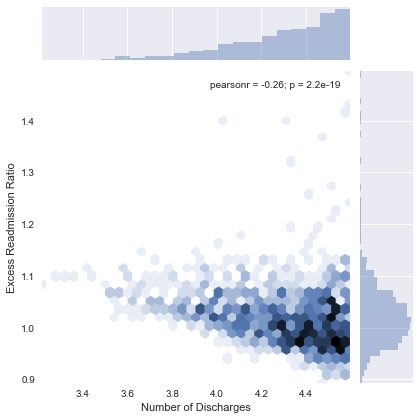

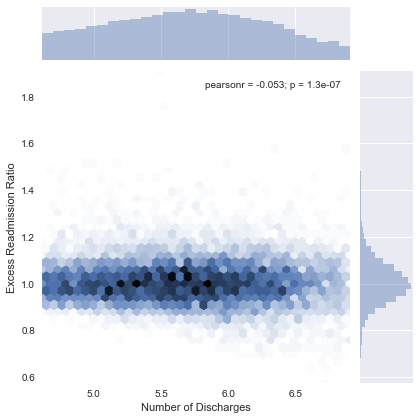

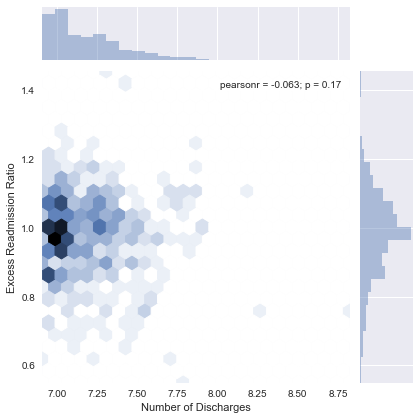

In [141]:
x_low, y_low = np.log(low['Number of Discharges']), low['Excess Readmission Ratio']

x_med, y_med = np.log(med['Number of Discharges']), med['Excess Readmission Ratio']

x_high, y_high = np.log(high['Number of Discharges']), high['Excess Readmission Ratio']

# f, axes = plt.subplots(1, 3, figsize=(20, 12), sharex=False, sharey=True)
sns.jointplot(x_low, y_low, kind="hex")

sns.jointplot(x_med, y_med, kind="hex")

sns.jointplot(x_high, y_high, kind="hex");


In [ ]:
clean_hospital_read_df['class'] = clean_hospital_read_df